# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [12]:
df = pd.read_csv('Dataset Hasil Clustering\data_klasifikasi_kesejahteraan.csv')
df.head()

,upah,gk,ump,peng,avg_upah_per_bulan,tahun,provinsi,kategori_dbs
0,11226,293697.0,1900000.0,395136.0,1975776,2015,ACEH,Menengah
1,11226,293697.0,1900000.0,260183.0,1975776,2015,ACEH,Menengah
2,11226,293697.0,1900000.0,655319.0,1975776,2015,ACEH,Menengah
3,11226,293697.0,1900000.0,466355.0,1975776,2015,ACEH,Menengah
4,11226,293697.0,1900000.0,529945.0,1975776,2015,ACEH,Menengah


In [16]:
le = LabelEncoder()
df['provinsi'] = le.fit_transform(df['provinsi'])
df

,upah,gk,ump,peng,avg_upah_per_bulan,tahun,provinsi,kategori_dbs
0,11226,293697.0,1900000.0,395136.0,1975776,2015,0,Menengah
1,11226,293697.0,1900000.0,260183.0,1975776,2015,0,Menengah
2,11226,293697.0,1900000.0,655319.0,1975776,2015,0,Menengah
3,11226,293697.0,1900000.0,466355.0,1975776,2015,0,Menengah
4,11226,293697.0,1900000.0,529945.0,1975776,2015,0,Menengah
...,...,...,...,...,...,...,...,...
21114,17542,521494.0,2729463.0,662025.0,3087392,2022,7,Tinggi
21115,17542,513170.0,2729463.0,665756.0,3087392,2022,7,Tinggi
21116,17542,513170.0,2729463.0,662025.0,3087392,2022,7,Tinggi
21117,17542,505468.0,2729463.0,665756.0,3087392,2022,7,Tinggi


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [17]:
# Tentukan kolom fitur dan target
fitur = ['upah', 'gk', 'ump', 'peng', 'avg_upah_per_bulan', 'tahun', 'provinsi']
target = 'kategori_dbs'

X = df[fitur]
y = df[target]


In [18]:
# Pisahkan data training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [20]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

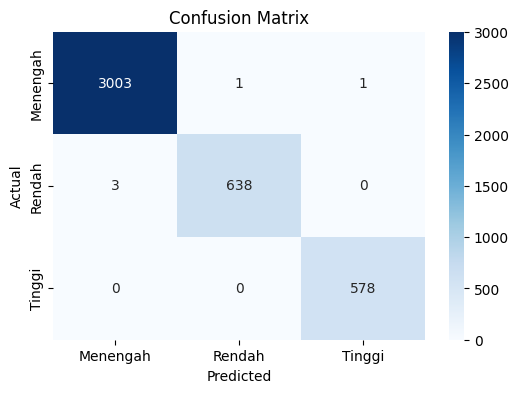

              precision    recall  f1-score   support

    Menengah       1.00      1.00      1.00      3005
      Rendah       1.00      1.00      1.00       641
      Tinggi       1.00      1.00      1.00       578

    accuracy                           1.00      4224
   macro avg       1.00      1.00      1.00      4224
weighted avg       1.00      1.00      1.00      4224



In [22]:
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [24]:
# Grid kombinasi parameter yang ingin diuji
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5]
}


In [25]:
# Inisialisasi model dasar
rf = RandomForestClassifier(random_state=42)

# Grid Search dengan 5-fold cross validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Jalankan pencarian parameter terbaik
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [26]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy (CV):", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy (CV): 0.9988162178159218


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [27]:
# Gunakan model terbaik dari hasil tuning
best_model = grid_search.best_estimator_

# Prediksi data uji
y_pred_tuned = best_model.predict(X_test)


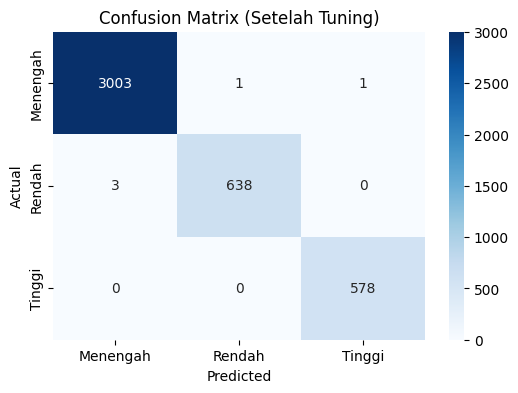

              precision    recall  f1-score   support

    Menengah       1.00      1.00      1.00      3005
      Rendah       1.00      1.00      1.00       641
      Tinggi       1.00      1.00      1.00       578

    accuracy                           1.00      4224
   macro avg       1.00      1.00      1.00      4224
weighted avg       1.00      1.00      1.00      4224



In [28]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix (Setelah Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print(classification_report(y_test, y_pred_tuned))

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Perbandingan Sebelum dan Setelah Tuning
    - Sebelum tuning, model Random Forest sudah menunjukkan akurasi sangat tinggi (100%) dengan hanya sedikit kesalahan klasifikasi.
    - Setelah tuning menggunakan GridSearchCV, performa tetap stabil dengan akurasi 100%, dan cross-validation score meningkat hingga 99.82%, yang menunjukkan bahwa hasil model cukup konsisten di berbagai subset data.
    - Kesimpulan: Tuning tidak secara signifikan meningkatkan akurasi akhir (karena sudah sangat tinggi), namun meningkatkan validitas model lewat cross-validation.

2. Identifikasi kelemahan model:
  - Precision & Recall untuk semua kelas adalah 1.00, artinya:
    - Tidak ada kelas yang diprediksi buruk
    - Semua kelas terklasifikasi sempurna (sangat jarang terjadi)
  - Apakah model mengalami overfitting atau underfitting?
    - Belum bisa dipastikan 100%, karena akurasi terlalu sempurna bisa jadi pertanda overfitting.
    - Namun, dengan cross-validation score yang tinggi juga (99.82%), kemungkinan overfitting kecil.
    - Kesimpulan: Model tidak menunjukkan kelemahan besar saat ini, namun tetap perlu diuji pada data baru yang tidak pernah dilihat model untuk benar-benar mengonfirmasi.

